In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://www.mykhel.com/cricket/ipl-stats-s4/#T20#tab-mostrun'

In [3]:
r = requests.get('https://www.mykhel.com/cricket/ipl-stats-s4/#T20#tab-mostrun')

In [4]:
r

<Response [200]>

In [5]:
soup = BeautifulSoup(r.text,'html.parser')

In [6]:
div = soup.find('div', attrs = {'stats-table T20-tab-mostrun'})

In [7]:
title = div.find_all('th')

In [8]:
header = [i.text for i in title if i != '']

In [9]:
df = pd.DataFrame(columns=header)

In [10]:
df

,POS,,PLAYER,TEAM,MATCHES,INN,RUNS,SR,4s,6s


In [11]:
rows = div.find_all('tr')

In [12]:
for i in rows[1:]:
    data = i.find_all('td')
    row = [tr.text for tr in data]
    l = len(df)
    df.loc[l] = row

In [13]:
df

,POS,,PLAYER,TEAM,MATCHES,INN,RUNS,SR,4s,6s
0,1,,Shubman Gill,Gujarat,17,17,890,157.80,85,33
1,2,,Faf du Plessis,Bangalore,14,14,730,153.68,60,36
2,3,,Devon Conway,Chennai,16,15,672,139.71,77,18
3,4,,Virat Kohli,Bangalore,14,14,639,139.82,65,16
4,5,,Yashasvi Jaiswal,Rajasthan,14,14,625,163.61,82,26
...,...,...,...,...,...,...,...,...,...,...
161,162,,Mohit Rathee,Punjab,1,1,1,50.00,-,-
162,163,,Mustafizur Rahman,Delhi,2,1,1,100.00,-,-
163,164,,Nathan Ellis,Punjab,10,2,1,14.29,-,-
164,165,,Varun Chakravarthy,Kolkata,14,2,1,11.11,-,-


In [14]:
#l1=[i.replace('-','0') for i in df['4s'].values]
l2=[i.replace('-','0') for i in df['6s'].values]  

In [15]:
#df['4s'] = l1
df['6s'] = l2

In [16]:
#df['4s'] = pd.to_numeric(df['4s'])
df['6s'] = pd.to_numeric(df['6s'])

(0.0, 50.0)

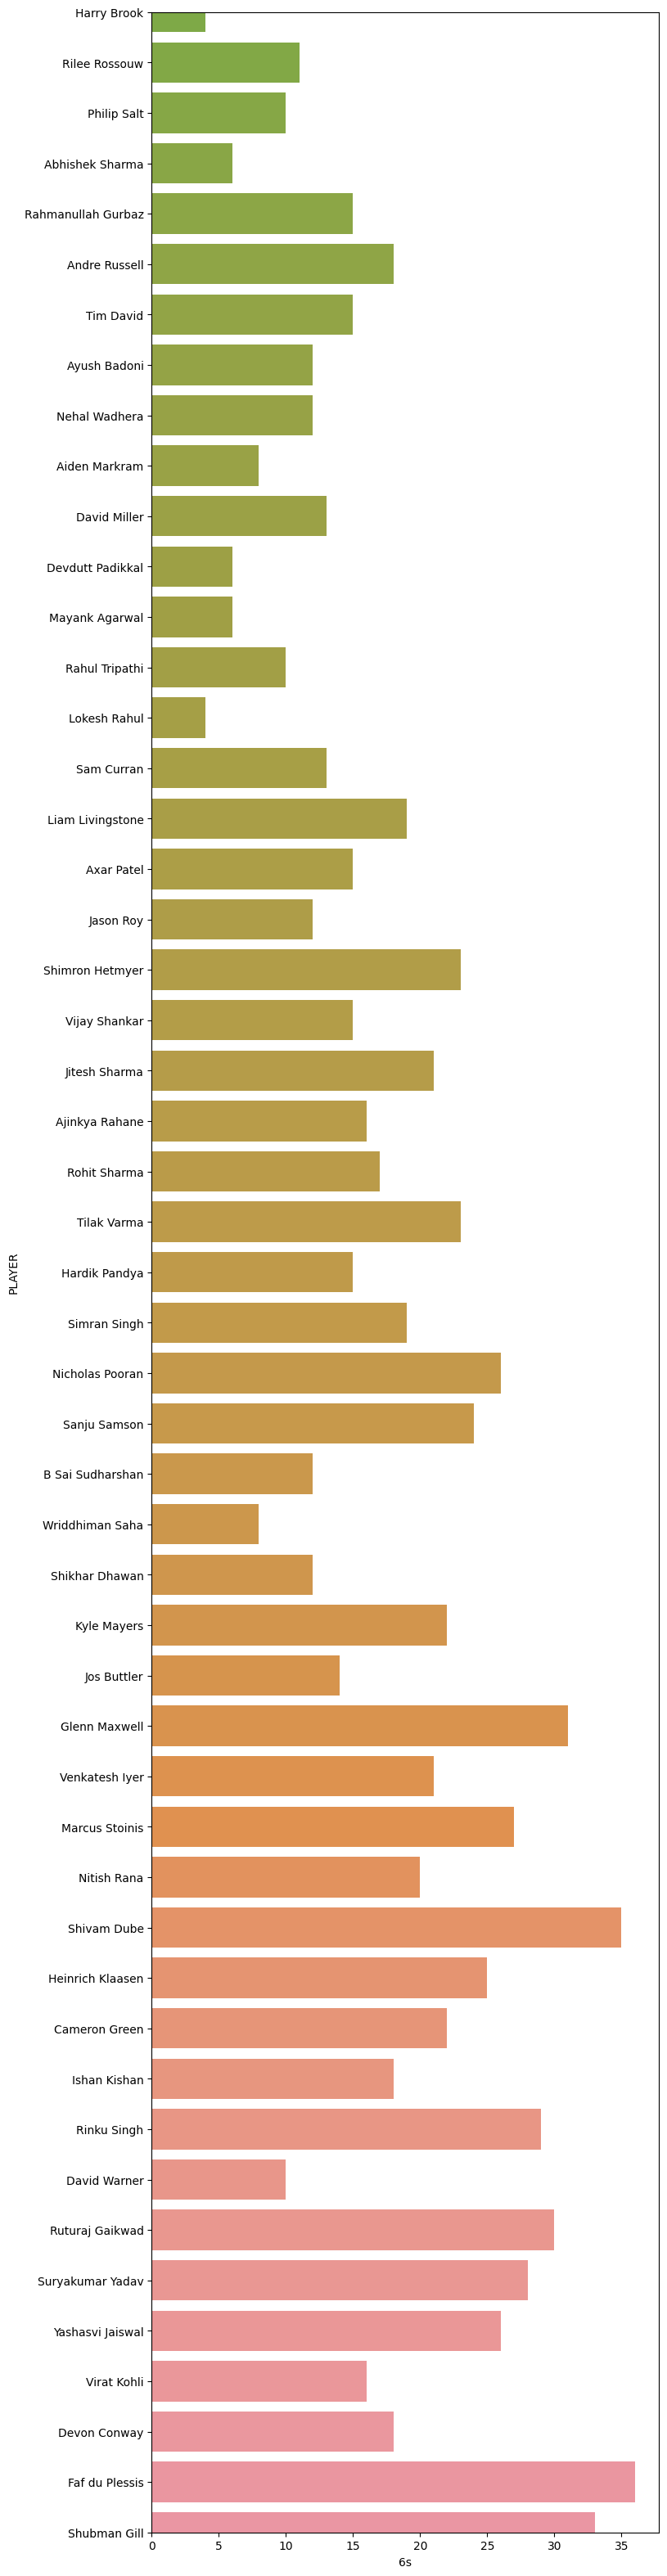

In [17]:

fig, ax = plt.subplots(figsize=(8, 40))
sns.barplot(y=df['PLAYER'],x=df['6s'])
ax.set_ylim(0, 50)
#plt.show()



In [ ]:
df.to_csv('web.csv',index=False)